# Tarea práctica 7
### Paula Ivanna Hernández Rizo

### Ejercicio 1. Descomposición LU.

In [2]:
# Inciso a)
import numpy as np

def descomposicion_lu(matriz):
    n = len(matriz)
    L = np.eye(n)
    # Comonzamos por inicializar L como la matriz identidad y luego  Copiamos
    # la matriz como U para modificarla
    U = matriz.astype(float)

# En esta parte comenzamos por calcular el factor de eliminación, posteriormente
# guardamos el factor en la matriz L y finalmente, eliminamos el elemento por
# debajo de la diagonal.
    for i in range(n):
        for j in range(i + 1, n):
            factor = U[j, i] / U[i, i]
            L[j, i] = factor
            U[j, :] -= factor * U[i, :]

    return L, U


In [3]:
# Inciso b)

# En esta parte definimos la matriz A, dada en el problema, y calculamos la des-
# composición LU usando la función "descomposicion_lu(matriz)" definida en el in-
# ciso anterior

A = np.array([
    [2, 1, 4, 1],
    [3, 4, -1, -1],
    [1, -4, 1, 5],
    [2, -2, 1, 3]
])

L, U = descomposicion_lu(A)

print("Matriz L (Triangular inferior):")
print(L)

print("\nMatriz U (Triangular superior):")
print(U)

Matriz L (Triangular inferior):
[[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]

Matriz U (Triangular superior):
[[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]


In [5]:
# Inciso c)

# Reconstruimos la matriz A usando L y U, y luego verificamos si A y A_reconstruida
# son iguales dentro de una tolerancia
A_reconstruida = np.dot(L, U)

print("\nMatriz A reconstruida (a partir de L y U):")
print(A_reconstruida)


if np.allclose(A, A_reconstruida):
    print("\nDescomposición LUlograda")
else:
    print("\n fallo en la verificación de la descomposición LU")



Matriz A reconstruida (a partir de L y U):
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]

Descomposición LU verificada con éxito


In [9]:
# Inciso d)

import numpy as np

def sustitucion_hacia_adelante(L, b):

    n = len(b)
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])
    return y

def sustitucion_hacia_atras(U, y):

    n = len(y)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

# Programa completo
def resolver_lu(A, b):

    L, U = descomposicion_lu(A)
    y = sustitucion_hacia_adelante(L, b)
    x = sustitucion_hacia_atras(U, y)
    return x

b = np.array([-4, 3, 9, 7])
x = resolver_lu(A, b)

print("\nVector solución x:")
print(x)



Vector solución x:
[ 2. -1. -2.  1.]


In [10]:
#Inciso e)

import numpy as np

# Resolvemos utilizando la función 'solve' de NumPy
x_numpy = np.linalg.solve(A, b)

print("\nSolución usando la función 'solve' de NumPy:")
print(x_numpy)

# Ahora, revismos si ambas soluciones son iguales dentro de una tolerancia
if np.allclose(x, x_numpy):
    print("\nlas  soluciones coinciden")
else:
    print("\nLas soluciones no coinciden.")



Solución usando la función 'solve' de NumPy:
[ 2. -1. -2.  1.]

las  soluciones coinciden


### Ejercicio 2. Pozo cuántico asimétrico

In [11]:
import numpy as np
from scipy.integrate import quad

#   Definimos las constantes dadas
L = 5e-10
a = 10 * 1.6022e-19
hbar = 1.0545718e-34
m_e = 9.1094e-31
e = 1.6022e-19

# Ahora las funciones de onda
def psi(n, x):
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

# integrando para H_mn
def integrando(x, m, n):
    return x * np.sin(m * np.pi * x / L) * np.sin(n * np.pi * x / L)

# Función para calcular H_mn
def H_mn(m, n):
    resultado, error = quad(integrando, 0, L, args=(m, n))
    return (2 * a / L**2) * resultado

# Hagamos un ejemplo, tomando m = 1 y n = 2
m = 1
n = 2
elemento_matriz = H_mn(m, n)
print(f"El elemento H_{m}{n} es: {elemento_matriz:.5e} J")

El elemento H_12 es: -2.88599e-19 J


In [12]:
#Inciso c)

import numpy as np
from scipy.integrate import quad

# Constantes
hbar = 1.0545718e-34
m_e = 9.10938356e-31
L = 5e-10
eV = 1.602e-19
a = 10 * eV
# Definir el integrando para H_mn
def integrando(x, m, n):
    return x * np.sin(m * np.pi * x / L) * np.sin(n * np.pi * x / L)

# Función para calcular H_mn
def H_mn(m, n):
    if m == n:  # Elementos diagonales (kinética + potencial)
        energia_kinetica = (hbar**2 * np.pi**2 * m**2) / (2 * m_e * L**2)
        resultado, _ = quad(integrando, 0, L, args=(m, n))
        energia_potencial = (2 * a / L**2) * resultado
        return energia_kinetica + energia_potencial
    else:  # Elementos fuera de la diagonal (solo potencial)
        resultado, _ = quad(integrando, 0, L, args=(m, n))
        return (2 * a / L**2) * resultado

# Creamos la matriz H de 10x10
tamaño_matriz = 10
H = np.zeros((tamaño_matriz, tamaño_matriz))
for m in range(1, tamaño_matriz + 1):
    for n in range(1, tamaño_matriz + 1):
        H[m-1, n-1] = H_mn(m, n)

# Ahora sí, el pasito mortal es calcular los valores propios de la matriz
valores_propios, _ = np.linalg.eigh(H)

# Convertimos estos valores propios a eV
valores_propios_eV = valores_propios / eV


print("Los primeros 10 niveles de energía (en eV) son:")
for i, energia in enumerate(valores_propios_eV):
    print(f"E{i+1} = {energia:.2f} eV")


estado_fundamental = valores_propios_eV[0]
print(f"\nEnergía del estado fundamental: {estado_fundamental:.2f} eV")


Los primeros 10 niveles de energía (en eV) son:
E1 = 5.84 eV
E2 = 11.18 eV
E3 = 18.66 eV
E4 = 29.15 eV
E5 = 42.66 eV
E6 = 59.19 eV
E7 = 78.74 eV
E8 = 101.30 eV
E9 = 126.86 eV
E10 = 155.57 eV

Energía del estado fundamental: 5.84 eV


In [ ]:
# Inciso d)
import numpy as np
from scipy.integrate import quad

# Constantes
hbar = 1.0545718e-34
m_e = 9.10938356e-31
L = 5e-10
eV = 1.602e-19
a = 10 * eV

def integrando(x, m, n):
    return x * np.sin(m * np.pi * x / L) * np.sin(n * np.pi * x / L)

def H_mn(m, n):
    if m == n:
        energia_kinetica = (hbar**2 * np.pi**2 * m**2) / (2 * m_e * L**2)
        resultado, _ = quad(integrando, 0, L, args=(m, n))
        energia_potencial = (2 * a / L**2) * resultado
        return energia_kinetica + energia_potencial
    else:
        resultado, _ = quad(integrando, 0, L, args=(m, n))
        return (2 * a / L**2) * resultado

# matriz H de 100x100
tamaño_matriz = 100
H = np.zeros((tamaño_matriz, tamaño_matriz))
for m in range(1, tamaño_matriz + 1):
    for n in range(1, tamaño_matriz + 1):
        H[m-1, n-1] = H_mn(m, n)

#valores propios de la matriz
valores_propios, _ = np.linalg.eigh(H)

#  valores propios a eV
valores_propios_eV = valores_propios / eV

# Imprimir los primeros 10 niveles de energía en eV
print("Los primeros 10 niveles de energía (en eV) con matriz 100x100 son:")
for i, energia in enumerate(valores_propios_eV[:10]):
    print(f"E{i+1} = {energia:.2f} eV")


Los primeros 10 niveles de energía (en eV) con matriz 100x100 son:
E1 = 5.83 eV
E2 = 11.17 eV
E3 = 18.65 eV
E4 = 29.14 eV
E5 = 42.65 eV
E6 = 59.18 eV
E7 = 78.73 eV
E8 = 101.28 eV
E9 = 126.85 eV
E10 = 155.43 eV


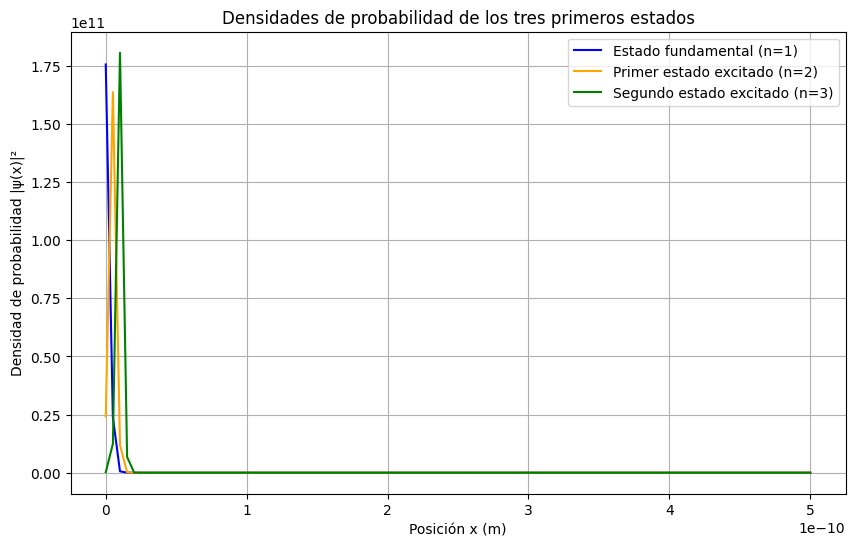

Normalización de ψ1: 1.0000
Normalización de ψ2: 1.0000
Normalización de ψ3: 1.0000


In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constantes
hbar = 1.0545718e-34
m_e = 9.10938356e-31
L = 5e-10
eV = 1.602e-19
a = 10 * eV


def integrando(x, m, n):
    return x * np.sin(m * np.pi * x / L) * np.sin(n * np.pi * x / L)


def H_mn(m, n):
    if m == n:
        energia_kinetica = (hbar**2 * np.pi**2 * m**2) / (2 * m_e * L**2)
        resultado, _ = quad(integrando, 0, L, args=(m, n))
        energia_potencial = (2 * a / L**2) * resultado
        return energia_kinetica + energia_potencial
    else:
        resultado, _ = quad(integrando, 0, L, args=(m, n))
        return (2 * a / L**2) * resultado

# matriz H de 100x100
tamaño_matriz = 100
H = np.zeros((tamaño_matriz, tamaño_matriz))
for m in range(1, tamaño_matriz + 1):
    for n in range(1, tamaño_matriz + 1):
        H[m-1, n-1] = H_mn(m, n)

# valores propios y vectores propios
valores_propios, vectores_propios = np.linalg.eigh(H)

# Extraemos las funciones de onda para los primeros tres estados
psi1 = vectores_propios[:, 0]
psi2 = vectores_propios[:, 1]
psi3 = vectores_propios[:, 2]

# Creamos puntos para graficar con la misma cantidad que los estados (100)
x = np.linspace(0, L, tamaño_matriz)

# Normalizamos las funciones de onda, como dice el problema
def normalizar(psi):
    dx = L / len(psi)
    norma = np.sqrt(np.sum(psi**2) * dx)
    return psi / norma

psi1_normalizada = normalizar(psi1)
psi2_normalizada = normalizar(psi2)
psi3_normalizada = normalizar(psi3)

# Y ahora, calculamos y graficamos las densidades de probabilidad
P1 = psi1_normalizada**2
P2 = psi2_normalizada**2
P3 = psi3_normalizada**2

plt.figure(figsize=(10, 6))
plt.plot(x, P1, label="Estado fundamental (n=1)", color='blue')
plt.plot(x, P2, label="Primer estado excitado (n=2)", color='orange')
plt.plot(x, P3, label="Segundo estado excitado (n=3)", color='green')
plt.title("Densidades de probabilidad de los tres primeros estados")
plt.xlabel("Posición x (m)")
plt.ylabel("Densidad de probabilidad |ψ(x)|²")
plt.legend()
plt.grid()
plt.show()

# Verificamos normalización
dx = L / len(x)
norma1 = np.sum(P1) * dx
norma2 = np.sum(P2) * dx
norma3 = np.sum(P3) * dx

print(f"Normalización de ψ1: {norma1:.4f}")
print(f"Normalización de ψ2: {norma2:.4f}")
print(f"Normalización de ψ3: {norma3:.4f}")



### Ejercicio 3. Método de relajación.

La solución para c = 2 es x = 0.7968118244957711


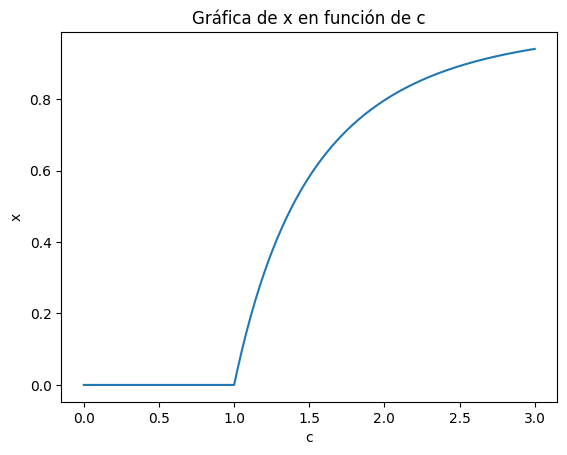

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Definimos la función f(x)
def funcion_x(c, x):
    return 1 - math.exp(-c * x)


def metodo_relajacion(c, tol=1e-6, max_iter=1000):
    x = 0.5  # tomamoos el valor inicial
    for _ in range(max_iter):
        nuevo_x = funcion_x(c, x)
        if abs(nuevo_x - x) < tol:  # IMPORTANTE: Verificamos si la solución converge
            return nuevo_x
        x = nuevo_x
    raise Exception("tenemos el número máximo de iteraciones sin convergenscia")

# Tomamos el parámetro inicial
c = 2
solucion = metodo_relajacion(c)
print(f"La solución para c = {c} es x = {solucion}")

# Calculamos valores de x para diferentes valores de c
valores_c = np.arange(0, 3.01, 0.01)
valores_x = []

for c in valores_c:
    try:
        x = metodo_relajacion(c)
        valores_x.append(x)
    except:
        valores_x.append(0)

# Graficamos x como función de c
plt.plot(valores_c, valores_x)
plt.xlabel("c")
plt.ylabel("x")
plt.title("Gráfica de x en función de c")
plt.show()



### Ejercicio 4. Glucólisis.

Inciso b)

In [ ]:
import numpy as np

def relaxation_method(a, b, tol=1e-6, max_iter=1000):
    # tomamos los valores iniciales
    x, y = 0.5, 0.5
    for i in range(max_iter):
        x_new = y * (a + x**2)
        y_new = b / (a + x**2)

        # En este paso, pense en mostrar las iteraciones, ya que no me daba un
        #valor exacto
        print(f"Iteración {i + 1}: x = {x_new:.6f}, y = {y_new:.6f}")

        # Verificamos convergencia
        if abs(x_new - x) < tol and abs(y_new - y) < tol:
            return (x_new, y_new), i

        # Actualizar valores
        x, y = x_new, y_new

    # Y en el caso en q no converga
    return (x, y), max_iter

# Ahora, tomamos los siguientes parámetros
a, b = 1, 2
solution, iterations = relaxation_method(a, b)

print("\nResultado:")
print(f"Solución: x = {solution[0]:.6f}, y = {solution[1]:.6f}")
print(f"Iteraciones realizadas: {iterations}")


Iteración 1: x = 0.625000, y = 1.600000
Iteración 2: x = 2.225000, y = 1.438202
Iteración 3: x = 8.558202, y = 0.336099
Iteración 4: x = 24.952951, y = 0.026939
Iteración 5: x = 16.800270, y = 0.003207
Iteración 6: x = 0.908359, y = 0.007061
Iteración 7: x = 0.012887, y = 1.095820
Iteración 8: x = 1.096002, y = 1.999668
Iteración 9: x = 4.401711, y = 0.908587
Iteración 10: x = 18.512507, y = 0.098159
Iteración 11: x = 33.738593, y = 0.005819
Iteración 12: x = 6.629327, y = 0.001755
Iteración 13: x = 0.078905, y = 0.044496
Iteración 14: x = 0.044773, y = 1.987625
Iteración 15: x = 1.991609, y = 1.995999
Iteración 16: x = 9.913144, y = 0.402697
Iteración 17: x = 39.975946, y = 0.020147
Iteración 18: x = 32.216567, y = 0.001251
Iteración 19: x = 1.299384, y = 0.001925
Iteración 20: x = 0.005175, y = 0.743937
Iteración 21: x = 0.743957, y = 1.999946
Iteración 22: x = 3.106861, y = 1.287439
Iteración 23: x = 13.714550, y = 0.187748
Iteración 24: x = 35.501030, y = 0.010577
Iteración 25: x =

Inciso c)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tomamos las constantes
a = 1
b = 2

# Ahora vamos a trabajar con el método de relajación, definiendo la siguiente
#función:

def metodo_relajacion(x, y, max_iter=1000, tol=1e-6):
    for _ in range(max_iter):
        # Reorganizamos las ecuaciones para x e y
        x_nueva = y * (a + x**2)
        y_nueva = (a + x**2) / b

        # Controlamos el crecimiento de x e y para evitar fallas
        if x_nueva > 1e10 or x_nueva < -1e10:
            x_nueva = np.sign(x_nueva) * 1e10
        if y_nueva > 1e10 or y_nueva < -1e10:
            y_nueva = np.sign(y_nueva) * 1e10

        # Verificamos si la solución ha convergido
        if np.abs(x_nueva - x) < tol and np.abs(y_nueva - y) < tol:
            return x_nueva, y_nueva
        x, y = x_nueva, y_nueva

    # Y si no converge, tenemos nada
    return None, None

# Tomamos los valores iniciales para x e y
x_inicial = 1.0
y_inicial = 1.0

# y para resolver x e y, usamos el metodo de relajacion
x_solucion, y_solucion = metodo_relajacion(x_inicial, y_inicial)

print("Punto estacionario usando el método de relajación:")
print("x =", x_solucion)
print("y =", y_solucion)

solucion_teorica_x = b
solucion_teorica_y = b / (a + b**2)
print(f"Solución teórica: x = {solucion_teorica_x}, y = {solucion_teorica_y}")




Punto estacionario usando el método de relajación:
x = 10000000000.0
y = 10000000000.0
Solución teórica: x = 2, y = 0.4


### Ejercicio 5. Constante de desplazamiento de Wien

Inciso b)

In [13]:
import math

# Creamos una función para buscar un intervalo donde se encuentre una raíz
def buscar_intervalo(funcion, a, b, dx):
    x1 = a
    f1 = funcion(a)
    x2 = a + dx
    f2 = funcion(x2)

    while f1 * f2 > 0.0:
        if x1 >= b:
            return None, None
        x1 = x2
        f1 = f2
        x2 = x1 + dx
        f2 = funcion(x2)

    return x1, x2

# usamos el metodo de bisección para encontrar una raíz en un intervalo dado
def biseccion(funcion, x1, x2, usar_cambio=0, epsilon=1.0e-6):
    f1 = funcion(x1)
    if f1 == 0.0:
        return x1
    f2 = funcion(x2)
    if f2 == 0.0:
        return x2
    if f1 * f2 > 0.0:
        print('La raíz no está dentro del intervalo dado')
        return None

    # Calculamos el número de iteraciones necesarias
    n = int(math.ceil(math.log(abs(x2 - x1) / epsilon) / math.log(2.0)))

    for _ in range(n):
        x3 = 0.5 * (x1 + x2)
        f3 = funcion(x3)

        if (usar_cambio == 1) and (abs(f3) > abs(f1)) and (abs(f3) > abs(f2)):
            return None

        if f3 == 0.0:
            return x3

        if f2 * f3 < 0.0:
            x1 = x3
            f1 = f3
        else:
            x2 = x3
            f2 = f3

    return (x1 + x2) / 2.0

# y finalmente, encontramos todas las raíces en un intervalo dado
def encontrar_raices(funcion, a, b, eps=1e-6):
    print('Las raíces en el intervalo [%f, %f] son:' % (a, b))
    while True:
        x1, x2 = buscar_intervalo(funcion, a, b, eps)
        if x1 is not None:
            a = x2
            raiz = biseccion(funcion, x1, x2, 1)
            if raiz is not None:
                print(round(raiz, -int(math.log(eps, 10))))
        else:
            print('\n Ya está ;)')
            break

# ahora, definimos la función f(x) = 5e^(-x) + x - 5
f = lambda x: 5 * math.exp(-x) + x - 5

encontrar_raices(f, -5, 5)


Las raíces en el intervalo [-5.000000, 5.000000] son:
-0.0
4.96511

 Ya está ;)


### Ejercico 6. El punto de Lagrange.

Nota, acá trabajé con dos métodos, el de bisección y el de Newton pero no me convence.
Ignora el metodo de bisección jaja.


In [ ]:
# Método de bisección. Para prueba.
import numpy as np

# Definición de las constantes
G = 6.674 * 10**-11
M = 5.974 * 10**24
m = 7.348 * 10**22
R = 3.844 * 10**8
w = 2.662 * 10**-6


def f(r):
    return (G * M) / r**2 - (G * m) / (R - r)**2 - w**2 * r


a = 100000000
b = 400000000

tol = 1e-10
max_iter = 100


i = 0
er = 1 / tol

# Método de Bisección
while er >= tol and i < max_iter:
    i += 1
    c = (a + b) / 2
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    er = abs(f(c))

print(f"Distancia requerida: {c} metros o {c / 1000} kilómetros")


Distancia requerida: 326045071.3336468 metros o 326045.0713336468 kilómetros


In [14]:
import numpy as np

# Definición de las constantes
G = 6.674 * 10**-11
M = 5.974 * 10**24
m = 7.348 * 10**22
R = 3.844 * 10**8
w = 2.662 * 10**-6

# Función de la ecuación dada
def f(r):
    if r == 0 or (R - r) == 0:
        return float('inf')
        # da infinito si hay división por cero
    return (G * M) / r**2 - (G * m) / (R - r)**2 - w**2 * r

# Derivada de la función f(r)
def df(r):
    if r == 0 or (R - r) == 0:
        return float('inf')  # Retornamos infinito si hay división por cero
    term1 = -2 * (G * M) / r**3
    term2 = 2 * (G * m) / (R - r)**3
    term3 = -w**2
    return term1 + term2 + term3

# usamos elMétodo de Newton
def newton_raphson(suposicion_inicial, tolerancia, max_iteraciones):
    r = suposicion_inicial
    for i in range(max_iteraciones):
        f_val = f(r)
        df_val = df(r)

        # evitamos división por cero en la derivada
        if df_val == 0:
            print("La derivada es cero, no se puede continuar el cálculo.")
            return None

        # Actualizamos la suposición usando la fórmula de Newton
        r = r - f_val / df_val

        # Verificamos si se alcanzo la tolerancia deseada
        if abs(f_val) < tolerancia:
            return r
        # evolución de los valores para depuración
        print(f"Iteración {i+1}: r = {r}, f(r) = {f_val}, f'(r) = {df_val}")
    return r

# Tomamos los parametros iniciales
suposicion_inicial = 3.8 * 10**8
tolerancia = 1e-10
max_iteraciones = 100

# Calcular el resultado usando el método de Newton
resultado = newton_raphson(suposicion_inicial, tolerancia, max_iteraciones)

if resultado is not None:
    print(f"Distancia requerida: {resultado} metros o {resultado / 1000} kilómetros")


Iteración 1: r = 382199819.4901495, f(r) = -0.25324029578723745, f'(r) = 1.1511867083695411e-07
Iteración 2: r = 383299912.40377706, f(r) = -1.013047234840366, f'(r) = 9.208742482485839e-07
Iteración 3: r = 383849958.11132705, f(r) = -4.052295145038613, f'(r) = 7.367197106379297e-06
Iteración 4: r = 384124979.39291394, f(r) = -16.209297646024584, f'(r) = 5.893833943502716e-05
Iteración 5: r = 384262489.744774, f(r) = -64.83731327103713, f'(r) = 0.0004715085984001015
Iteración 6: r = 384331244.87881166, f(r) = -259.349378628916, f'(r) = 0.003772072911482773
Iteración 7: r = 384365622.440233, f(r) = -1037.397641500822, f'(r) = 0.030176591899197653
Iteración 8: r = 384382811.2202214, f(r) = -4149.590693715248, f'(r) = 0.24141275276751442
Iteración 9: r = 384391405.61012393, f(r) = -16598.36290294426, f'(r) = 1.9313020576485826
Iteración 10: r = 384395702.8050636, f(r) = -66393.45174043108, f'(r) = 15.450416532700599
Iteración 11: r = 384397851.402532, f(r) = -265573.807087901, f'(r) = 123